In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,Python,R,spark,aws,excel
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,84.5,Affinity Solutions\n,New York,1,22,1,0,0,0,1
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,84.5,ManTech\n,Chantilly,0,52,0,0,0,0,0
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,...,84.5,Takeda\n,Cambridge,0,239,1,0,1,0,0
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,...,84.5,A Place for Mom\n,Overland Park,0,20,1,0,0,1,1
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,...,84.5,GovTech\n,San Francisco,0,4,1,0,0,0,1


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'Python', 'R', 'spark',
       'aws', 'excel'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.job_simp.value_counts()

data scientist    627
na                175
data engineer      85
analyst            73
mle                16
manager            12
director           12
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        847
senior    152
jr          1
Name: seniority, dtype: int64

In [11]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

San Francisco    64
New York         62
Cambridge        38
Seattle          31
Chicago          28
                 ..
Jamaica           1
Quincy            1
Provo             1
Albany            1
Wichita           1
Name: job_state, Length: 291, dtype: int64

In [12]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2728
1      3490
2      3915
3      5230
4      2905
       ... 
995    4240
996    7013
997    3906
998    3499
999    3604
Name: desc_len, Length: 1000, dtype: int64

In [13]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['Competitors']

0                   Commerce Signals, Cardlytics, Yodlee
1                                                     -1
2                               Novartis, Baxter, Pfizer
3      Enlivant, Sunrise Senior Living, Brookdale Sen...
4                                                     -1
                             ...                        
995                                                   -1
996                                                   -1
997                                          Freddie Mac
998                                                   -1
999                            KPMG, Accenture, Deloitte
Name: Competitors, Length: 1000, dtype: object

In [16]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [17]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
60,1,68,92
61,1,68,92
62,1,68,92
63,1,68,92
64,1,68,92
65,1,68,92
66,1,68,92
67,1,68,92
68,1,68,92
69,1,68,92


In [18]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [19]:
df['company_txt']

0      Affinity Solutions
1                 ManTech
2                  Takeda
3         A Place for Mom
4                 GovTech
              ...        
995          Shelf Engine
996           Wells Fargo
997            Fannie Mae
998    XSELL Technologies
999                NYSTEC
Name: company_txt, Length: 1000, dtype: object

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,Python,R,spark,aws,excel,desc_len,num_comp
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.581300,1650.801000,0.030000,0.0,84.570000,122.670000,101.820000,0.424000,31.525000,0.662000,0.003000,0.238000,0.239000,0.411000,3573.130000,0.813000
std,1.323818,741.158672,0.170673,0.0,23.553766,30.556092,29.383516,0.494438,44.513355,0.473265,0.054717,0.426072,0.426686,0.492261,1802.620357,1.270293
min,-1.000000,-1.000000,0.000000,0.0,41.000000,63.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,3.400000,1920.750000,0.000000,0.0,68.000000,101.000000,89.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2403.750000,0.000000
50%,3.800000,1995.000000,0.000000,0.0,83.000000,121.000000,99.500000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3352.500000,0.000000
75%,4.300000,2008.000000,0.000000,0.0,105.000000,138.000000,121.500000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4486.000000,2.000000
max,5.000000,2019.000000,1.000000,0.0,139.000000,229.000000,184.000000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18555.000000,3.000000


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'Python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

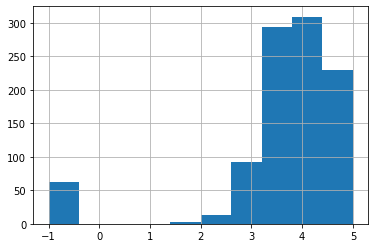

In [22]:
df.Rating.hist()

<AxesSubplot:>

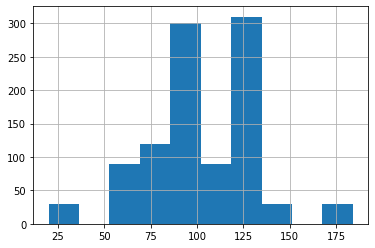

In [24]:
df.avg_salary.hist()

<AxesSubplot:>

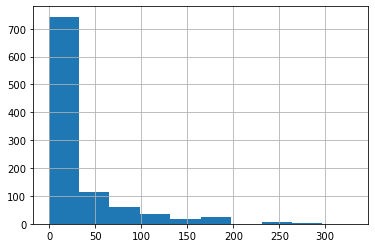

In [25]:
df.age.hist()

<AxesSubplot:>

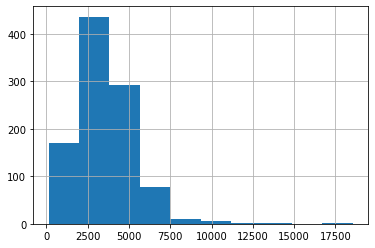

In [26]:
df.desc_len.hist()

<AxesSubplot:>

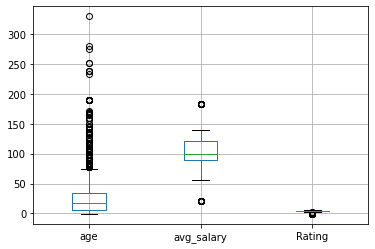

In [27]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

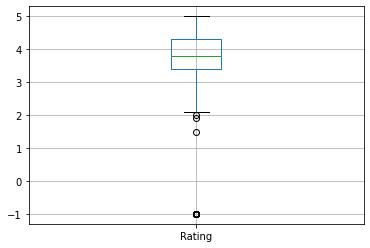

In [28]:
df.boxplot(column = 'Rating')

In [29]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.034152,0.082409,0.32537
avg_salary,0.034152,1.000000,-0.037977,-0.01813
Rating,0.082409,-0.037977,1.000000,0.09444
desc_len,0.325370,-0.018130,0.094440,1.00000


<AxesSubplot:>

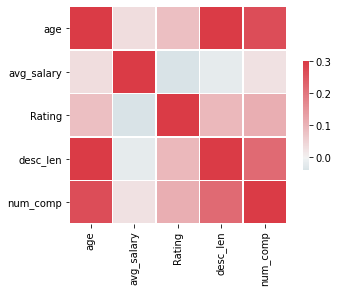

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'Python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [34]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'Python', 'R',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 295


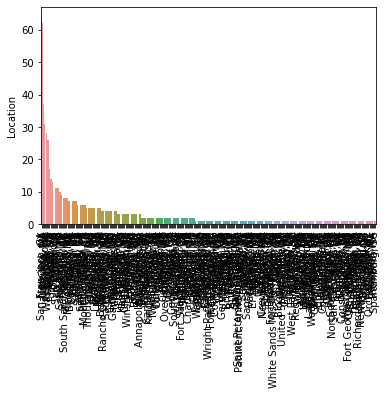

graph for Headquarters: total = 315


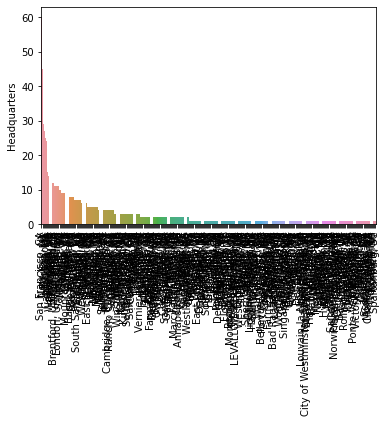

graph for Size: total = 9


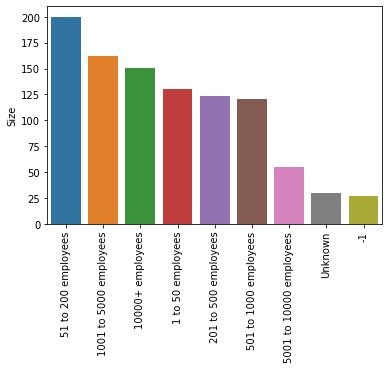

graph for Type of ownership: total = 12


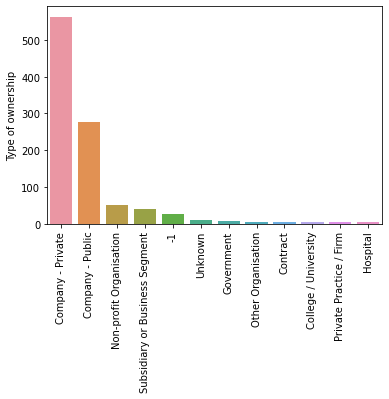

graph for Industry: total = 73


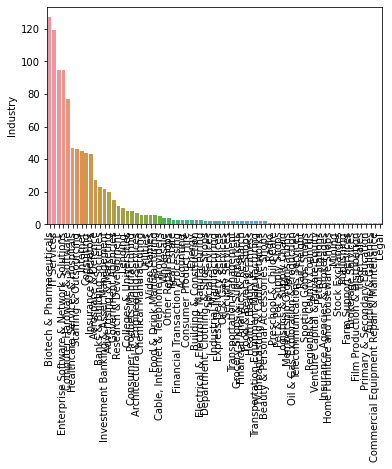

graph for Sector: total = 24


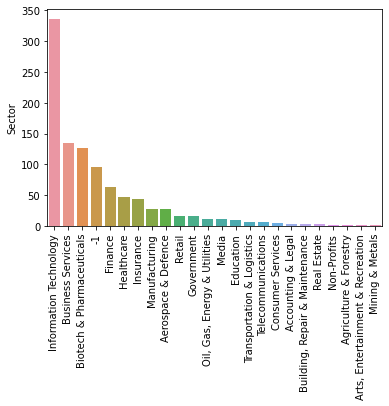

graph for Revenue: total = 13


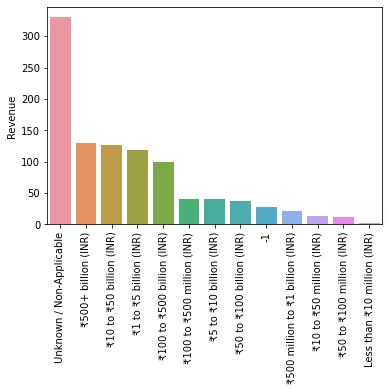

graph for company_txt: total = 723


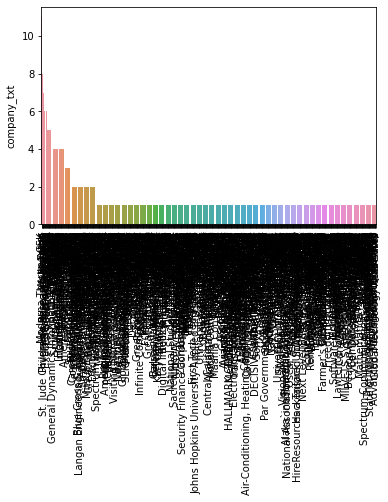

graph for job_state: total = 291


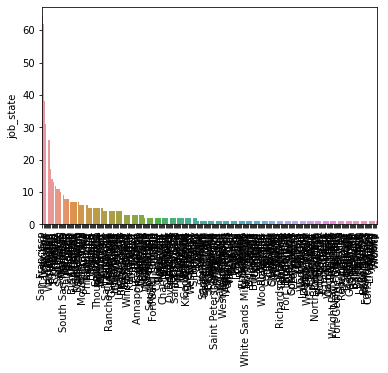

graph for same_state: total = 2


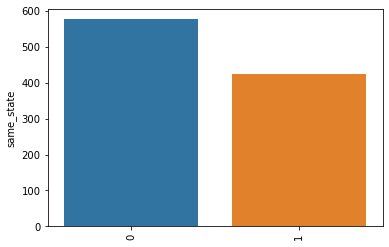

graph for Python: total = 2


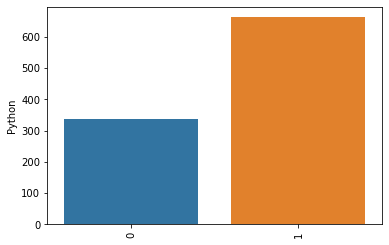

graph for R: total = 2


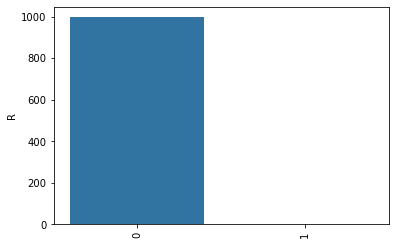

graph for spark: total = 2


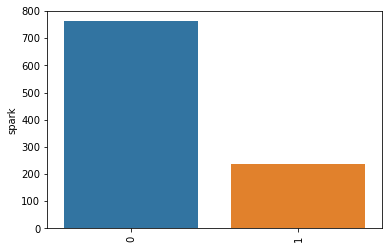

graph for aws: total = 2


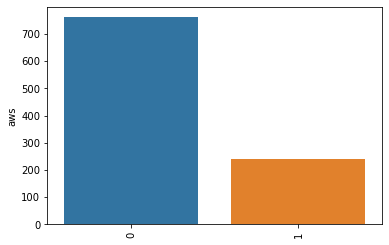

graph for excel: total = 2


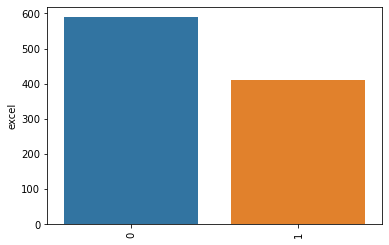

graph for job_simp: total = 7


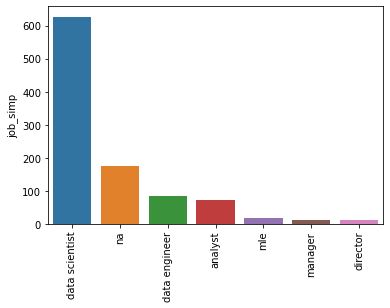

graph for seniority: total = 3


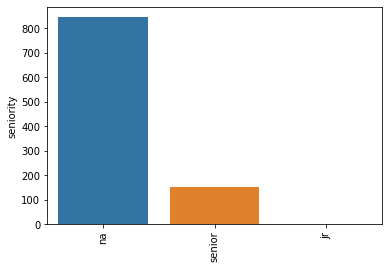

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


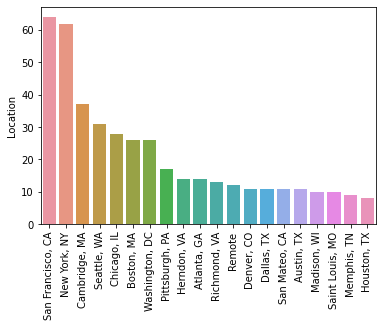

graph for Headquarters: total = 20


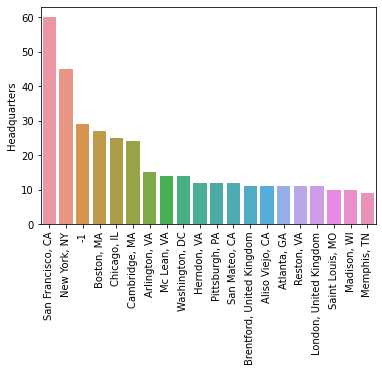

graph for company_txt: total = 20


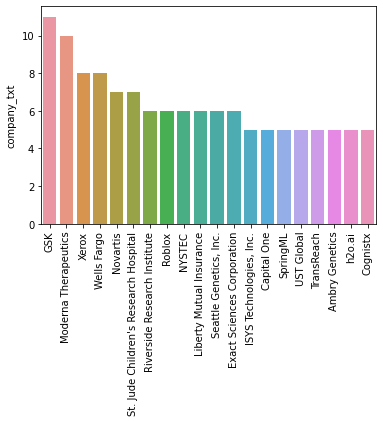

In [36]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'Python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [38]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,99.376712
data engineer,98.823529
data scientist,103.628389
director,97.083333
manager,99.375000
mle,110.906250
na,97.477143


In [39]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr         109.000000
               na          99.267857
               senior      99.156250
data engineer  na         100.383333
               senior      95.080000
data scientist na         103.901739
               senior     100.605769
director       na         102.100000
               senior      72.000000
manager        na          96.888889
               senior     106.833333
mle            na         104.136364
               senior     125.800000
na             na         100.261905
               senior      90.316327

In [40]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state            job_simp                  
Wright Patterson AFB na                    57.0
Worcester            na                    99.5
                     data scientist        93.5
Woonsocket           data scientist        80.0
Woodland Hills       data scientist       130.0
...                                         ...
Albany               analyst              184.0
Akron                data scientist        93.5
                     analyst              124.5
                     na                   154.0
Adelphi              data scientist       110.5

[428 rows x 1 columns]

In [42]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [43]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state                 job_simp                  
Wright Patterson AFB      na                       1
Worcester                 na                       1
                          data scientist           1
Woonsocket                data scientist           1
Woodland Hills            data scientist           1
Woodbridge                data scientist           2
Winters                   data scientist           1
Winston-Salem             na                       2
                          manager                  1
Windsor                   na                       1
Wilmington                data scientist           1
Wichita                   analyst                  1
Whittier                  data scientist           1
White Sands Missile Range data scientist           1
Westminster               na                       1
                          analyst                  1
Westlake                  data engineer            1
West Palm Beach           data scientist           1
West New York             data scientist           1
Wellesley                 data scientist           1
Watertown                 na                       1
Washington                data scientist          21
                          data engineer            2
                          analyst                  3
Waltham                   director                 1
                          data scientist           1
                          na                       3
Walnut Creek              data scientist           1
Virginia                  data scientist           2
                          data engineer            1
Vienna                    data scientist           1
Vicksburg                 na                       2
Vancouver                 analyst                  1
Valencia                  na                       1
Vail                      na                       1
United States             data engineer            1
                          data scientist           3
Tysons                    data scientist           2
Twin Falls                na                       1
Tulsa                     na                       1
                          analyst                  1
Thousand Oaks             data scientist           5
Tempe                     data scientist           1
Tacoma                    analyst                  1
Sunnyvale                 data scientist           5
Sterling                  data scientist           1
Stamford                  data scientist           2
Springfield               data scientist           3
                          data engineer            1
                          mle                      1
Spartanburg               analyst                  1
Southfield                data scientist           1
South San Francisco       na                       5
                          mle                      1
                          manager                  1
                          director                 1
South Plainfield          na                       2
Somerville                data scientist           1
Smithfield                director                 1
Simi Valley               mle                      2
Sheboygan                 data scientist           1
Seattle                   data engineer            4
                          na                       7
                          data scientist          20
Scotts Valley             manager                  1
Schaumburg                data scientist           1
Santa Monica              data scientist           1
Santa Clara               data scientist           6
                          data engineer            1
                          analyst                  1
Santa Barbara             data scientist           2
Santa Ana                 data scientist           1
Sandy                     data scientist           1
Sandpoint                 data scientist           1
San Ramon     

In [44]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
Richland,184.000000
Bothell,184.000000
New Hyde Park,140.500000
Bedford,140.500000
Conshohocken,140.500000
Sandy,140.500000
Andover,140.500000
College Park,140.500000
Livermore,140.500000


In [45]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'Python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [46]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'Python', 'R', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [47]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.6    114.666667
 3.0    110.977273
 4.3    108.500000
 3.8    107.967742
-1.0    107.669355
 3.4    106.925926
 4.7    106.777778
 3.3    106.000000
 4.9    105.700000
 4.4    104.382353
 5.0    103.443548
 2.3    103.333333
 2.9    103.000000
 4.0    102.877049
 3.9    102.226562
 3.6    102.057377
 3.5    100.565217
 2.1    100.500000
 4.6    100.279412
 2.8     99.181818
 4.1     98.415254
 2.7     98.200000
 3.2     97.500000
 3.7     95.862069
 4.2     95.500000
 4.8     92.343750
 2.2     92.000000
 1.9     91.000000
 4.5     89.152778
 3.1     87.307692
 2.0     84.500000
 2.5     56.666667
 1.5     56.500000
 2.4     20.000000
Industry
                                           avg_salary
Industry                                             
Home Furniture and Houseware Shops         140.500000
Telecommunications Services                140.500000
Venture Capital & Private Equity           127.500000
Grocery Shops & Supermarkets  

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [55]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'avg_salary', aggfunc = 'count')

Python,0,1
Revenue,,
-1,8,19
Less than ₹10 million (INR),1,2
Unknown / Non-Applicable,84,246
₹1 to ₹5 billion (INR),38,80
₹10 to ₹50 billion (INR),58,68
₹10 to ₹50 million (INR),2,11
₹100 to ₹500 billion (INR),39,61
₹100 to ₹500 million (INR),19,22
₹5 to ₹10 billion (INR),13,27


In [56]:
df.to_csv('eda_data.csv')